## Getting data via yfinance

How to download OHLCV data from yfinance

In [19]:
import yfinance as yf

# get ohlcv data for any ticker by period.
data_1mo_5min = yf.download("MSFT", period='1mo', interval="5m")

# get ohlcv data for any ticker by start date and end date
data_date_range = yf.download("MSFT", start="2017-01-01", end="2020-04-24")

# get intraday data for any ticker by period.
data_1mo_1d = yf.download("MSFT", period='1mo', interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
type(data_1mo_5min)

pandas.core.frame.DataFrame

Getting data for multiple tickers


In [21]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]

start = dt.datetime.today()-dt.timedelta(360)
end = dt.datetime.today()

cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
cl_price["INFY.NS"].head()

Date
2022-04-11    1729.140503
2022-04-12    1705.550781
2022-04-13    1711.521729
2022-04-14            NaN
2022-04-18    1587.064331
Name: INFY.NS, dtype: float64

In [23]:
ohlcv_data.keys()

dict_keys(['AMZN', 'MSFT', 'INTC', 'GOOG', 'INFY.NS', '3988.HK'])

In [24]:
ohlcv_data["INFY.NS"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-11,1814.000000,1814.000000,1762.550049,1766.550049,1729.140503,8248407
2022-04-12,1757.500000,1757.500000,1727.750000,1742.449951,1705.550781,6456184
2022-04-13,1754.949951,1757.500000,1732.000000,1748.550049,1711.521729,6257693
2022-04-18,1605.500000,1650.000000,1590.000000,1621.400024,1587.064209,30523965
2022-04-19,1636.650024,1636.650024,1550.000000,1562.000000,1528.922241,17044923
...,...,...,...,...,...,...
2023-03-29,1379.000000,1389.900024,1364.550049,1383.550049,1383.550049,8813966
2023-03-31,1404.000000,1429.949951,1393.900024,1427.949951,1427.949951,8711975
2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1410.849976,5242764


As long as the `yfinance` library is up and running, we wouldn't need the following code. However, it's better to be safe than sorry. Thus, the following code block demonstrates different libraries that would get our job done, for getting the data for a specific ticker. 

Getting data via different package `yahoofinancials`

In [25]:
from yahoofinancials import YahooFinancials

ticker = 'MSFT'
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2018-04-24", "2020-04-24", "daily")


In [26]:
data.keys()

dict_keys(['MSFT'])

In [27]:
(data["MSFT"]["prices"])[:2]

[{'date': 1524576600,
  'high': 96.47000122070312,
  'low': 92.41000366210938,
  'open': 96.23999786376953,
  'close': 93.12000274658203,
  'volume': 34524800,
  'adjclose': 87.88430786132812,
  'formatted_date': '2018-04-24'},
 {'date': 1524663000,
  'high': 93.30000305175781,
  'low': 90.27999877929688,
  'open': 93.30000305175781,
  'close': 92.30999755859375,
  'volume': 33729300,
  'adjclose': 87.11984252929688,
  'formatted_date': '2018-04-25'}]

`yahoo_financials` give data in the form of json unlike yfiance which gives us the data in the form of a dataframe

In [28]:
import pandas as pd
from yahoofinancials import YahooFinancials
import datetime as dt

all_tickers = ["AAPL","MSFT","CSCO","AMZN","INTC"]

# extracting stock data (historical close price) for the stocks identified
close_prices = pd.DataFrame()
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')

for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[["formatted_date","adjclose"]]
    temp.set_index("formatted_date",inplace=True)
    temp.dropna(inplace=True)
    close_prices[ticker] = temp["adjclose"]
    
    
# extracting stock data (ohlcv) for the stocks identified
ohlv_dict = {}
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')
for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[["formatted_date","adjclose","open","low","high","volume"]]
    temp.set_index("formatted_date",inplace=True)
    temp.dropna(inplace=True)
    ohlv_dict[ticker] = temp

In [29]:
ohlv_dict.keys()

dict_keys(['AAPL', 'MSFT', 'CSCO', 'AMZN', 'INTC'])

In [30]:
ohlv_dict["AMZN"]

,adjclose,open,low,high,volume
formatted_date,,,,,
2018-04-09,70.304001,71.251503,70.128502,71.924004,84164000
2018-04-10,71.810997,71.599503,70.785004,71.918999,85082000
2018-04-11,71.352501,71.972000,71.244499,72.439003,71650000
2018-04-12,72.425003,71.974998,71.752998,72.606003,62700000
2018-04-13,71.539497,72.457001,71.225998,72.988998,73706000
...,...,...,...,...,...
2023-03-30,102.000000,101.550003,101.010002,103.040001,53633400
2023-03-31,103.290001,102.160004,101.949997,103.489998,56704300
2023-04-03,102.410004,102.300003,101.430000,103.290001,41135700


## OHLCV data and perform basic data operations

In [31]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

#familiarizing with data
cl_price.head(8) #prints the first 8 rows of the dataframe
cl_price.tail() #prints the last 5 rows of the dataframe
cl_price.describe() #performs summary statistic of each numerical columns in the datafrme

# Mean, Median, Standard Deviation
cl_price.mean() #calculates mean stock price for each stock
cl_price.median() #calculates median stock price for each stock
cl_price.std() #calculates standard deviation of stock price for each stock

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return = cl_price/cl_price.shift(1) - 1 #Performs same operation as above

daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN       0.021217
MSFT       0.017707
BHEL.NS    0.028858
GOOG       0.017781
dtype: float64

In [32]:
daily_return["BHEL.NS"].tail(20) * 100

Date
2023-03-06    0.267744
2023-03-08    4.205609
2023-03-09   -0.832801
2023-03-10   -0.516798
2023-03-13   -3.571429
2023-03-14    0.740745
2023-03-15    0.401063
2023-03-16    0.665779
2023-03-17    0.925932
2023-03-20   -2.686767
2023-03-21    2.154880
2023-03-22   -2.175348
2023-03-23    0.134779
2023-03-24   -3.364737
2023-03-27   -1.044568
2023-03-28   -1.337093
2023-03-29    0.285313
2023-03-31   -0.355619
2023-04-03   -0.356888
2023-04-05   -2.435537
Name: BHEL.NS, dtype: float64

## OHLCV data and perform rolling operations

In [33]:

import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

# Rolling operations (simple)
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max()
daily_return.rolling(window=10).sum()

# Rolling operations (exponentialy weighted)
daily_return.ewm(com=10, min_periods=10).mean()
daily_return.ewm(com=10, min_periods=10).std()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,MSFT,BHEL.NS,GOOG
Date,,,,
2013-04-08,NaN,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN,NaN
2013-04-11,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-28,0.018906,0.017481,0.020650,0.023070
2023-03-29,0.020134,0.017317,0.019815,0.022015
2023-03-31,0.020785,0.017857,0.018893,0.021655


In [34]:
daily_return["BHEL.NS"].ewm(com=10, min_periods=10).mean().tail(20) * 100

Date
2023-03-06    0.290130
2023-03-08    0.646082
2023-03-09    0.511638
2023-03-10    0.418144
2023-03-13    0.055456
2023-03-14    0.117755
2023-03-15    0.143510
2023-03-16    0.190989
2023-03-17    0.257802
2023-03-20   -0.009886
2023-03-21    0.186911
2023-03-22   -0.027840
2023-03-23   -0.013056
2023-03-24   -0.317755
2023-03-27   -0.383829
2023-03-28   -0.470489
2023-03-29   -0.401780
2023-03-31   -0.397583
2023-04-03   -0.393884
2023-04-05   -0.579488
Name: BHEL.NS, dtype: float64

## Import OHLCV data and perform basic visualizations

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

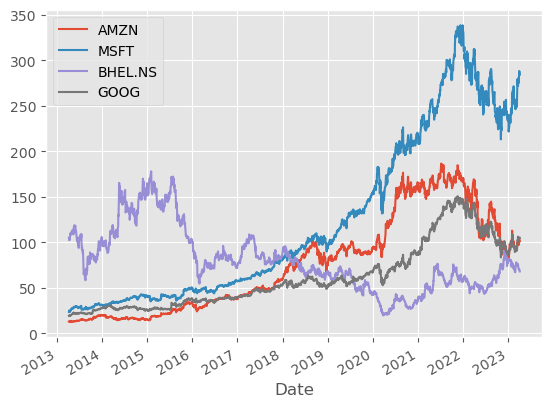

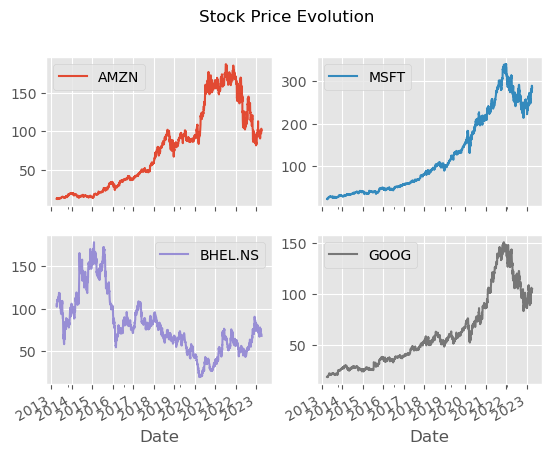

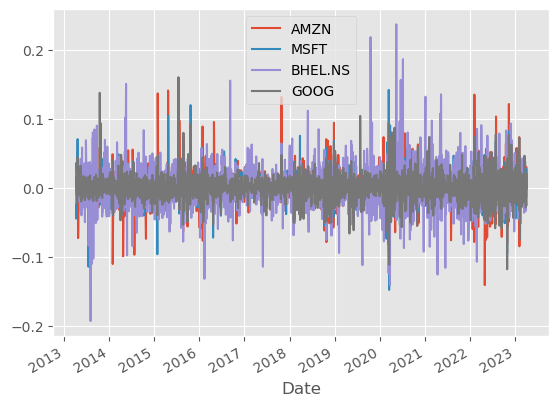

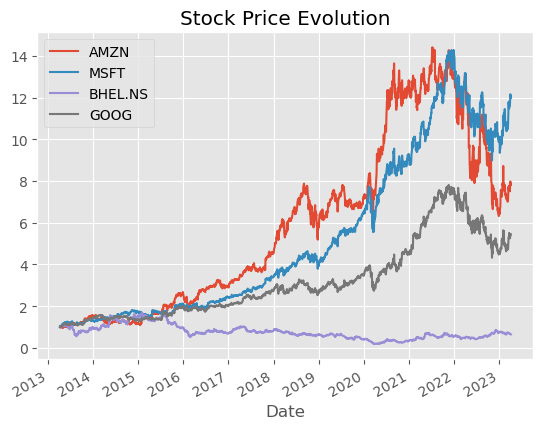

In [35]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
  
#plotting close prices
cl_price.plot() 
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks
  
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)    
# cumprod is what we call running product in our leetcode problems 
    
    
    
    
    
    

## Import OHLCV data and perform visualizations using pyplot module

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<BarContainer object of 4 artists>

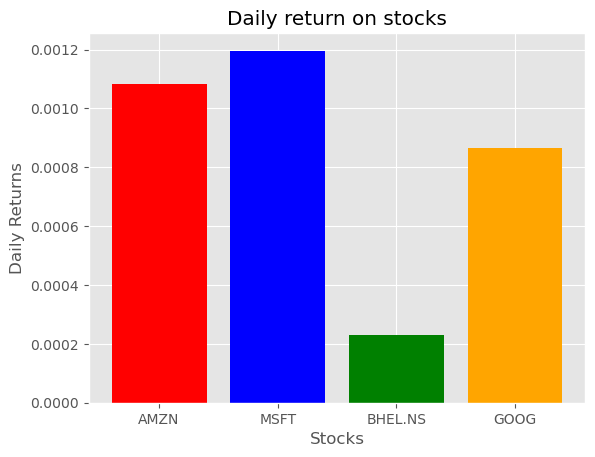

In [36]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
 
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"]) 
